## `Problem Statement`:

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the **highest claim settlement ratio**. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.

As it's a fast growing startup, `the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months`. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months**. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

## `Importing the libreries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
pd.options.display.max_columns=100  #---- to display all the columns.

## `Load the dataset`

In [2]:
# train data

train = pd.read_csv('train.csv')
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
# test data

test = pd.read_csv('test.csv')

In [5]:
# train and test dataset

print('Number of rows in train:',train.shape[0])
print('Number of columns in train:',train.shape[1],'\n')
print('Number of rows in train:',test.shape[0])
print('Number of columns in train:',test.shape[1])

Number of rows in train: 58592
Number of columns in train: 44 

Number of rows in train: 39063
Number of columns in train: 43


In [6]:
# Checking for Imbalanced data.

train.is_claim.value_counts()  

0    54844
1     3748
Name: is_claim, dtype: int64

* Yes, train data is imbalanced.

In [7]:
# Data information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

* No missing values in the data.

In [8]:
# Five point summary

train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# 

## `Univariate Analysis`

In [9]:
# Lets Combine the data (train, test)

combined = pd.concat([train,test])

In [10]:
# checking the shape

train.shape,   test.shape,   combined.shape

((58592, 44), (39063, 43), (97655, 44))

In [11]:
# Numerical columns
num_cols = combined.select_dtypes(include = np.number).columns

# Categorical columns
cat_cols = combined.select_dtypes(include = 'object').columns

In [13]:
print('Number of numerical columns:',len(num_cols))
print('Number of Categorical columns:',len(cat_cols))

Number of numerical columns: 16
Number of Categorical columns: 28


#### 1. Numerical Analysis

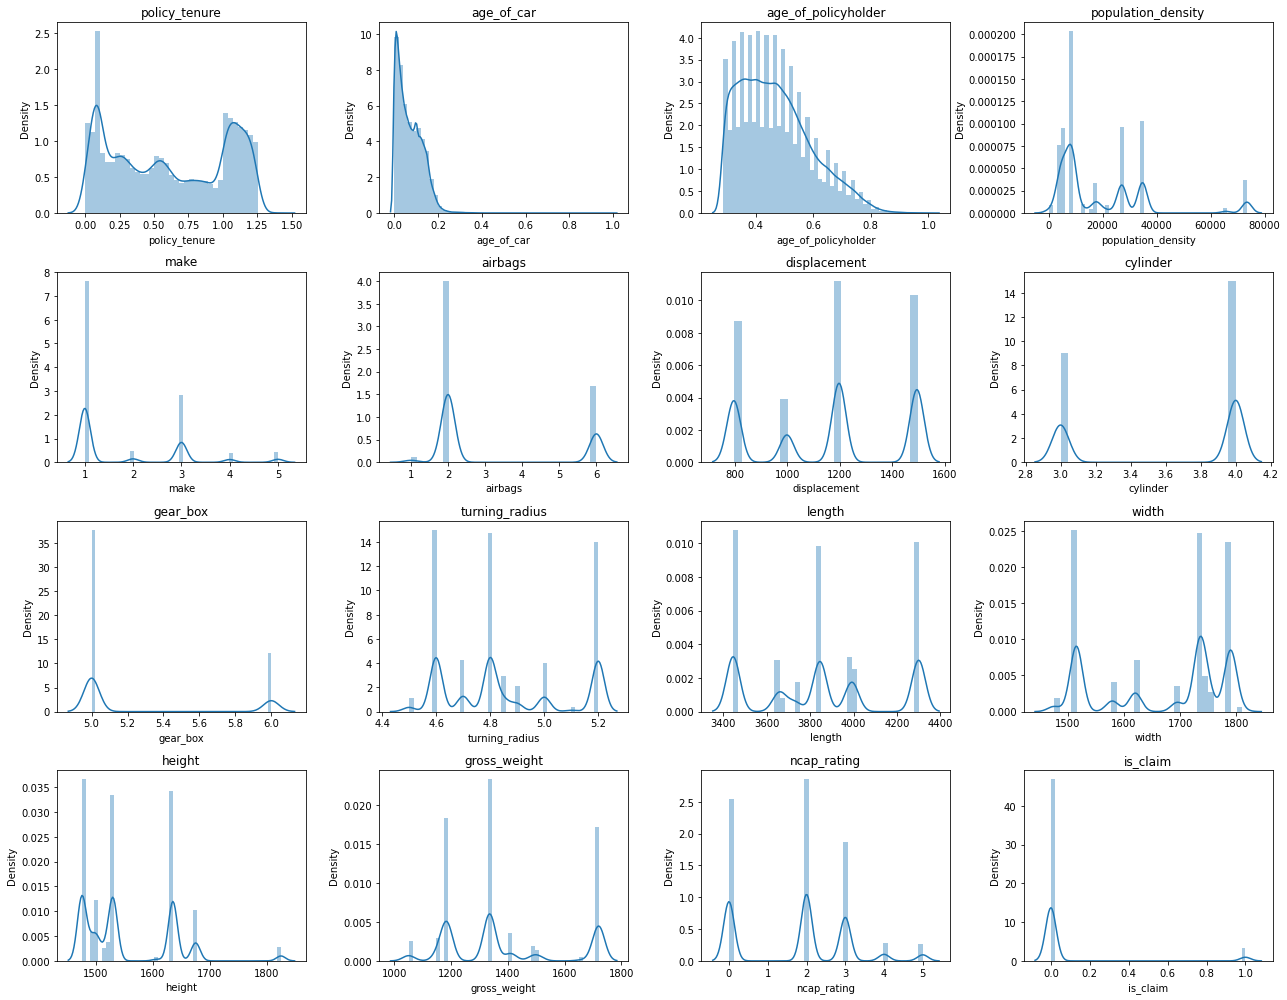

In [14]:
plt.figure(figsize=(18,14))  # ------ fixing the figure size.

t =1
for i in num_cols:
    plt.subplot(4,4,t)    #----------- it plot all plots in a figure
    sns.distplot(combined[i])     #------ distribution plot
    plt.title(i)    # ---------------------giving the title to the graph
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:
* Policy tenure is uniform 0 to 1.25.
* Age of car is right skewed.
* Age of policy holder is skewed.
* Most of the cars of manufacturer 1.
* Most of the cars have 2 airbags.
* Most of the cars NCAP rating is 0,2,3.

#### 2. Categorical Columns

In [15]:
cat_vars = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

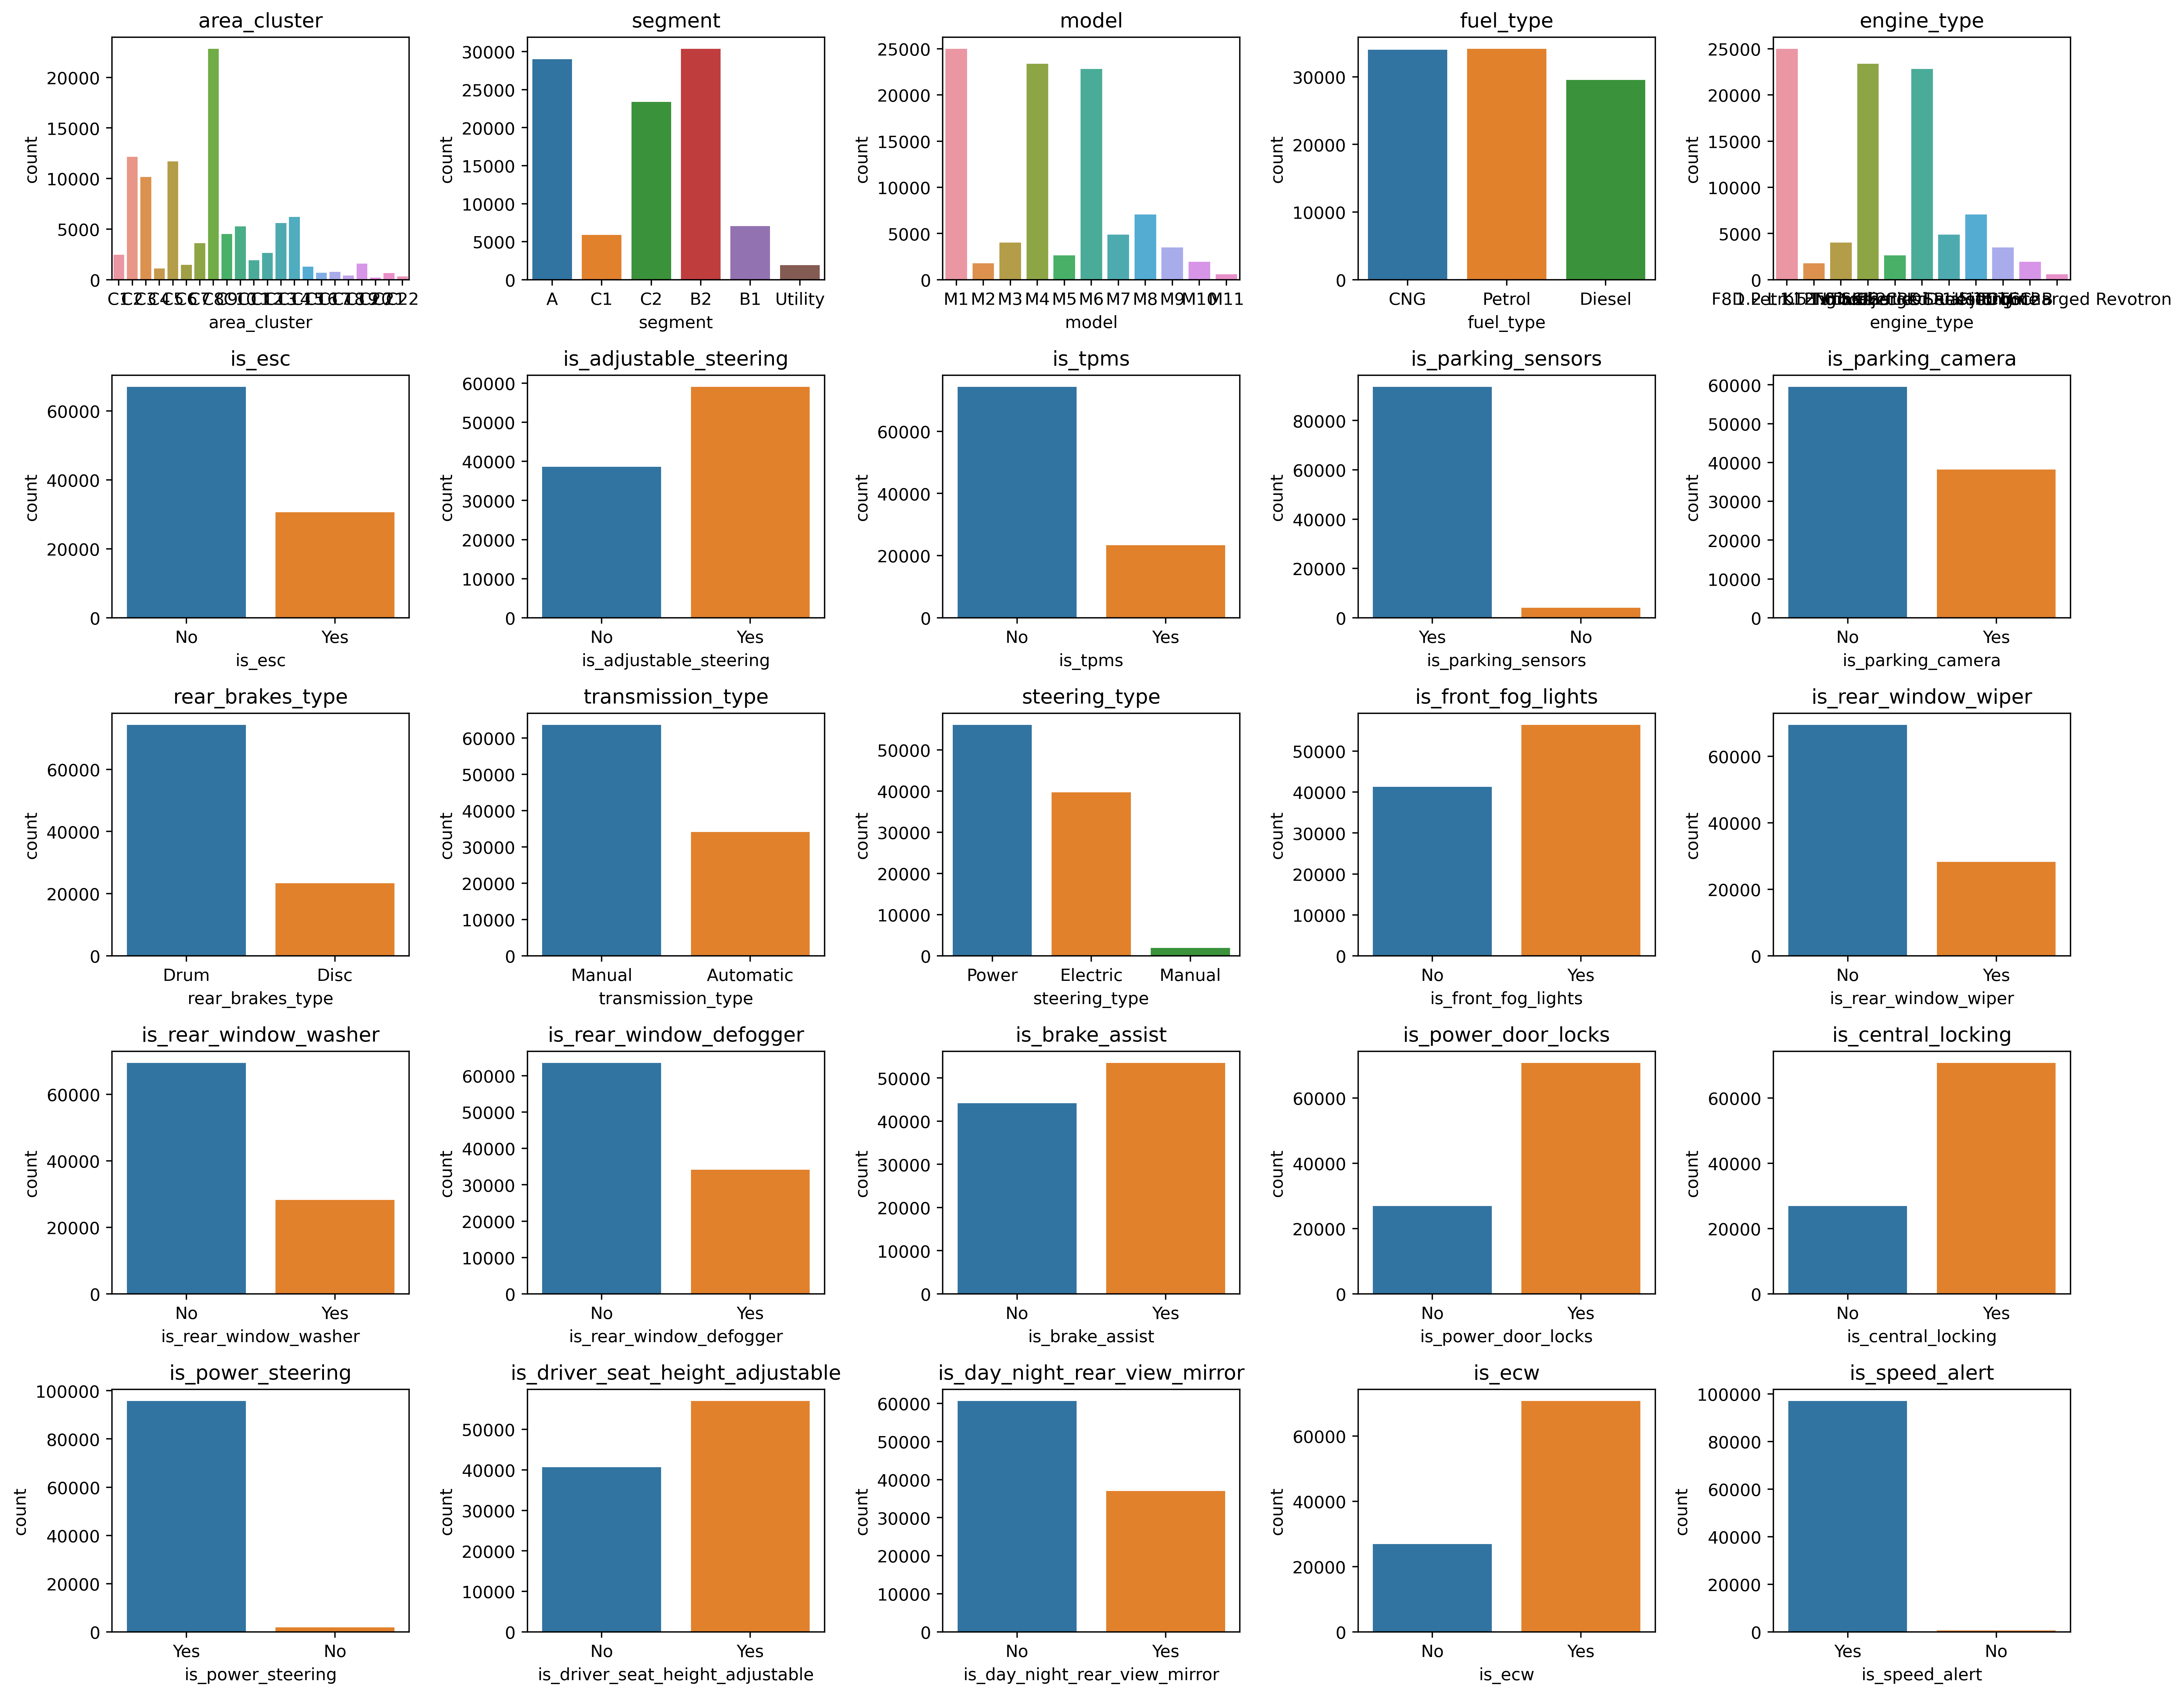

In [16]:
plt.figure(figsize=(18,14),dpi=400)

t =1
for i in cat_vars:
    plt.subplot(5,5,t)
    sns.countplot(combined[i])
    plt.title(i)    
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:
* Maximum policy holders are from area C8.
* Maximum insurance are for B2 manufacturer.
* M1, M4, M6 model have maximum number of policies.
* Most of the cars have features like adjustable steering, parking sensor, drum breaks, manual transmission, power steering, front fog lights, power door locks, central locking, driver seat adjustable, Engine check waranty and speed alert.
* Most of the car have no  features like electronic stability, tyre pressure monitering, parking camera, rear window wiper, rear window washer, rear window defogger, day-night rear view mirror.

## `Bivariate Analysis`

#### Numeric variables

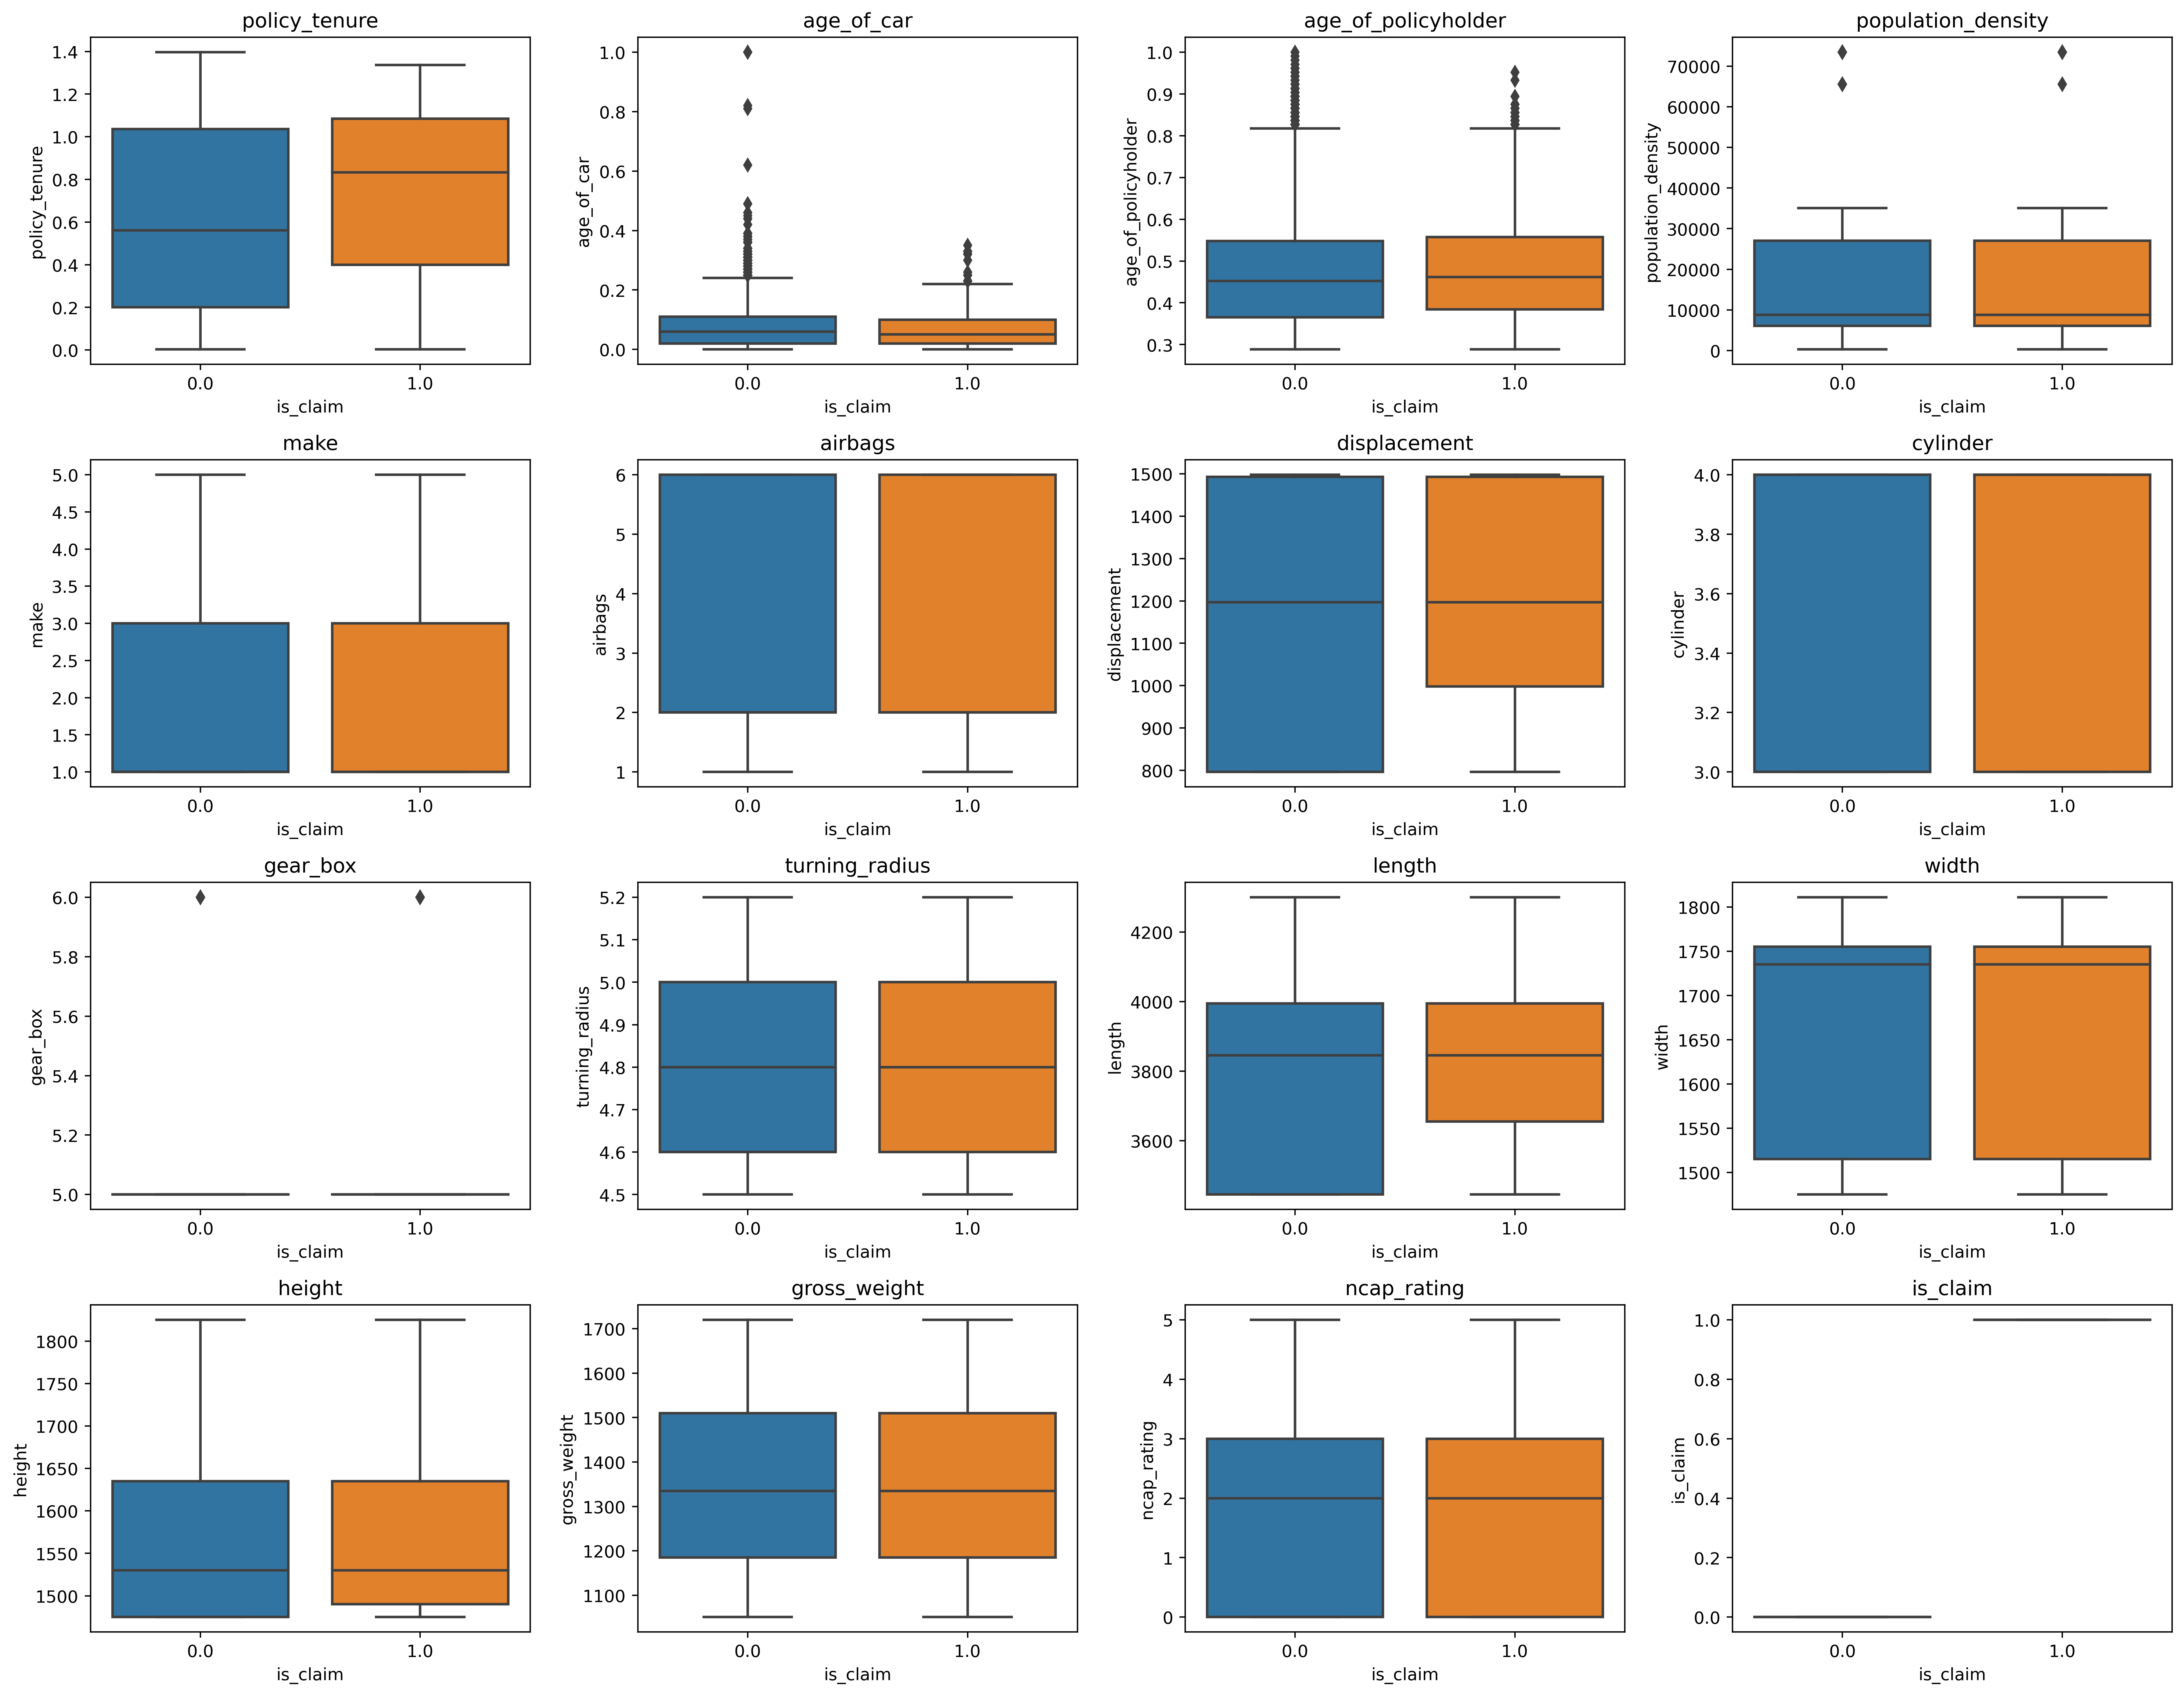

In [17]:
plt.figure(figsize=(18,14), dpi = 400)  # ------ fixing the figure size.

t =1
for i in num_cols:
    plt.subplot(4,4,t)
    sns.boxplot(combined.is_claim,combined[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:
* policy_tenure have some impact on target varibale.

In [18]:
# Apply Satistical tests

# Two sample T test

# Ho: That feature have no effect on target or vice-versa.
# Ha: That feature have effect on target or vice-versa.


imp_features = []
cols = num_cols.drop('is_claim')

for i in cols:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    test_stats, pvalue = stats.ttest_ind(zero, one, alternative='two-sided')
    if pvalue<0.05:
        print('Important Feature:',i,' '*(40-(20+len(i))),'&   P value:',round(pvalue,2))
        imp_features.append(i)

Important Feature: policy_tenure         &   P value: 0.0
Important Feature: age_of_car            &   P value: 0.0
Important Feature: age_of_policyholder   &   P value: 0.0
Important Feature: population_density    &   P value: 0.0
Important Feature: cylinder              &   P value: 0.0
Important Feature: width                 &   P value: 0.02


In [19]:
print('Important features for target variable: ',imp_features)

Important features for target variable:  ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width']


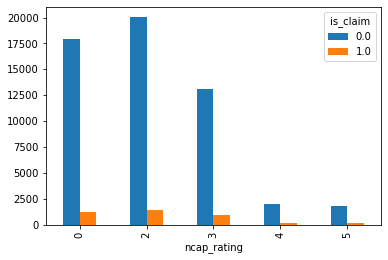

In [20]:
# Ncap rating vs target

pd.crosstab(combined.ncap_rating, combined.is_claim).plot(kind='bar')  # making cross table
plt.show()

##### Inferences:
* We can infer that the cars that have low ncap rating are more prone to the claims.

In [21]:
# Statistical test

# Ho: Ncap_rating have no effect on target variable.
# Ha: Ncap_rating have effect on target variable.

table = pd.crosstab(combined.ncap_rating, combined.is_claim)
test_stats, pvalue, dof, exp = stats.chi2_contingency(table)
print('P value:',pvalue)

P value: 0.8325265632423358


* P value > 0.05, So we fail to reject the Ho. So there is no effect of the variable on target column.
* But we keep this column as we know from domain prespective it affects the claim.

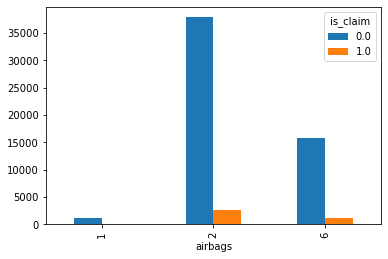

In [22]:
# Airbag vs target

pd.crosstab(combined.airbags, combined.is_claim).plot(kind='bar')
plt.show()

##### Inferences:
* We can infer that the cars that have less airbags are more prone to the claims.

In [23]:
# Statistical test.

# Ho: Ncap_rating have no effect on target variable.
# Ha: Ncap_rating have effect on target variable.

table = pd.crosstab(combined.airbags, combined.is_claim)
test_stats, pvalue, dof, exp = stats.chi2_contingency(table)
print('P value: ',pvalue)

P value:  0.733046343840305


* P value > 0.05, So we fail to reject the Ho. So there is no effect of the variable on target column.
* But we keep this column as we know from domain prespective it affects the claim.

In [24]:
# Statistical test for remaining columns.

# chi-square contingency.

cat_features = []

for i in cat_vars:
    table = pd.crosstab(combined.loc[:,i],combined.is_claim)
    test_stats, pvalue, dof, exp_freq = stats.chi2_contingency(table)
    if pvalue<0.05:
        print('Important Feature:',i,' '*(55-(20+len(i))),'&   P value:',round(pvalue,2))  
        cat_features.append(i)

Important Feature: area_cluster                         &   P value: 0.0
Important Feature: segment                              &   P value: 0.03
Important Feature: model                                &   P value: 0.03
Important Feature: engine_type                          &   P value: 0.03
Important Feature: is_adjustable_steering               &   P value: 0.0
Important Feature: is_parking_sensors                   &   P value: 0.05
Important Feature: is_front_fog_lights                  &   P value: 0.0
Important Feature: is_brake_assist                      &   P value: 0.01
Important Feature: is_driver_seat_height_adjustable     &   P value: 0.01


# 

## `Feature Engineering`

In [25]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [26]:
# extracting Nm_torque, rpm_torque in Max torque

combined[['Nm_torque','rpm_torque']]=combined.max_torque.str.split('@',expand = True)

In [27]:
# extracting bhp, rpm_power in Max Power

combined[['bhp','rpm_power']]=combined.max_power.str.split('@',expand = True)

In [28]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [29]:
# Taking only the numeric values in Nm_torque, rpm_torque, rpm_power, bhp
# Using lambda function we retrive only float value.

combined.rpm_torque=combined.rpm_torque.apply(lambda x: float(x[:-3]))
combined.rpm_power=combined.rpm_power.apply(lambda x: float(x[:-3]))
combined.Nm_torque=combined.Nm_torque.apply(lambda x: float(x[:-2]))
combined.bhp=combined.bhp.apply(lambda x: float(x[:-3]))

In [30]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60.0,3500.0,40.36,6000.0


# 

In [31]:
# Label Encoding for features which contains only Yes No.

for i in cat_vars:
    if i.startswith('is')&(i!='is_claim'):  # ------- checking varible is starts with 'is' and exclude target variable.
        yes_no_dict = {'Yes':1,'No':0}   #--------------making dictionary to do label encoding.
        combined[i]=combined[i].map(yes_no_dict)
        


# We can also use below code.
# yes_no = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors','is_parking_camera','is_front_fog_lights',
#        'is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks',
#        'is_central_locking', 'is_power_steering','is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
#        'is_ecw', 'is_speed_alert']
# yes_no_dict = {'Yes':1,'No':0}

# for i in yes_no:
#     combined[i]=combined[i].map(yes_no_dict)

In [32]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,bhp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,113.0,4400.0,88.50,6000.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,91.0,4250.0,67.06,5500.0


In [33]:
# per unit torque

combined['per_unit_torque'] = combined.rpm_torque/combined.Nm_torque
combined['per_unit_power']  = combined.rpm_power/combined.bhp

In [34]:
# Age proportion

combined['age_prop']=combined.age_of_car/combined.age_of_policyholder

In [35]:
# Magic 1  - number of policies in that area.

combined['magic1'] = combined.groupby('area_cluster')['policy_id'].transform('nunique')

#transform to get statistical value.

In [36]:
# magic 2 - number of policy id in area / population density of that area

combined['magic2'] = combined.magic1/combined.population_density

In [37]:
combined['magic3']=combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4']=combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5']=combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6']=combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [38]:
# Statistical Test for all the magic features.

features = ['magic1','magic2','magic3','magic4','magic5','magic6']
for i in features:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    test_stats, pvalue = stats.ttest_ind(zero, one, alternative='two-sided')
    
# Returning only the important features for target.    
    if pvalue<0.05:
        print('Important Feature:',i,' '*(55-(20+len(i))),'&   P value:',round(pvalue,2))

Important Feature: magic1                               &   P value: 0.0
Important Feature: magic2                               &   P value: 0.0
Important Feature: magic3                               &   P value: 0.02
Important Feature: magic5                               &   P value: 0.0
Important Feature: magic6                               &   P value: 0.0


In [39]:
# Mass density

combined['density'] = combined.gross_weight/(combined.length*combined.width*combined.height)

## 

In [40]:
# to encode 0 & 1 of transmission type ----we give 1 to that which have high claims.

pd.crosstab(combined.transmission_type,combined.is_claim)

# we give 1 to manual.

is_claim,0.0,1.0
transmission_type,,
Automatic,19101,1310
Manual,35743,2438


In [41]:
# Doing label encoding of transmission type variable.

combined.transmission_type=np.where(combined.transmission_type=='Manual',1,0)

In [42]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,bhp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6,density
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802,1.539304e-07
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343,1.539304e-07


# 

In [43]:
# to encode 0 & 1 of rear break type ----we give 1 to that which have high claims.

pd.crosstab(combined.rear_brakes_type,combined.is_claim)

# we give 1 to Drum.

is_claim,0.0,1.0
rear_brakes_type,,
Disc,13117,901
Drum,41727,2847


In [44]:
# Label encoding for rear breaks type variable.

combined.rear_brakes_type=np.where(combined.rear_brakes_type=='Drum',1,0)

# 

### Split the data in train , test

In [45]:
# Drop those column from which we already extract the info and we don't need them any more.

combined.drop(['policy_id','max_torque','max_power','magic4'],axis = 1, inplace = True)

In [46]:
# New train dataset for model training.
new_train = combined.iloc[0:train.shape[0],]

# New test dataset for model testing.
new_test = combined.iloc[train.shape[0]:,]

In [47]:
# Compairing old train test and new train test dataset.

train.shape, new_train.shape, test.shape, new_test.shape

((58592, 44), (58592, 54), (39063, 43), (39063, 54))

In [48]:
# Drop the target variable from train and test.

X= new_train.drop('is_claim',axis = 1)
y = new_train.is_claim

new_test = new_test.drop('is_claim',axis = 1)

In [49]:
# Category encoding for those features which have more than 2 caterogy in them.

cat_encode = ['segment','model','fuel_type','engine_type','steering_type','area_cluster']

import category_encoders as ce
tgt = ce.TargetEncoder(cols = cat_encode)

newX = tgt.fit_transform(X,y)
test_encoded = tgt.transform(new_test)

In [52]:
# Scale the dataset

scale = ['policy_tenure','population_density','displacement','length','width','height','gross_weight','Nm_torque',
        'rpm_torque','bhp','rpm_power','per_unit_torque','per_unit_power','magic1','magic3','magic5','magic6','density']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in scale:
    newX.loc[:,i] = sc.fit_transform(pd.DataFrame(newX.loc[:,i]))    # scaling and transforming the data.
    test_encoded.loc[:,i] = sc.transform(pd.DataFrame(test_encoded.loc[:,i]))

# 

## `Building Machine Learning Model`

### Random Forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')

# fitting and predicting
pred = rf.fit(newX,y).predict(test_encoded)

##### prepairing submission file for Random forest.

In [54]:
submission = pd.read_csv('submission.csv')

In [55]:
submission['is_claim']=pred

In [56]:
submission.to_csv('Random_Forest_model.csv', index = False)           # test score: 0.0374

# 

### SMOTE
#### Balancing the train data using SMOTE

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [58]:
# Resample the data using smote

smote_X , smote_y = smote.fit_resample(newX,y)

In [59]:
# Applying Random forest after balancing train data.

rf = RandomForestClassifier(criterion='entropy')
pred_smote = rf.fit(smote_X,smote_y).predict(test_encoded)

##### prepairing submission file for random forest after appling SMOTE

In [60]:
submission['is_claim'] = pred_smote
submission.to_csv('Smote_rf_model.csv',index =False)         # test score: 0.1072

# 

### Stacking

In [61]:
# importing libreries

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
# Define base Models

def base_models():
    model = dict()
    model['lg'] = LogisticRegression()
    model['rf'] = RandomForestClassifier(criterion = 'entropy')
    model['ada'] = AdaBoostClassifier()
    model['gbm']= GradientBoostingClassifier()
    model['lgbm'] = LGBMClassifier()
    model['catboost'] = CatBoostClassifier()
    model['naivebayes'] = GaussianNB()
    return model

In [63]:
# Evaluation function
# from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    score = cross_val_score(model, smote_X, smote_y,scoring='f1', cv = cv, error_score = 'raise',n_jobs = -1)
    return score

In [64]:
# Build the Models and checking their performance.

models = base_models()
result, names = list(),list()
for name, model in models.items():
    final_score = eval_score(model)
    result.append(final_score)
    names.append(name)
    print('Model: ',names[-1],'    score:',np.mean(result[-1]))

Model:  lg     score: 0.5911280296971415
Model:  rf     score: 0.9066247004384069
Model:  ada     score: 0.7202552914115065
Model:  gbm     score: 0.8861344343752672
Model:  lgbm     score: 0.9517704055197835
Model:  catboost     score: 0.9594749132529738
Model:  naivebayes     score: 0.5866490872407893


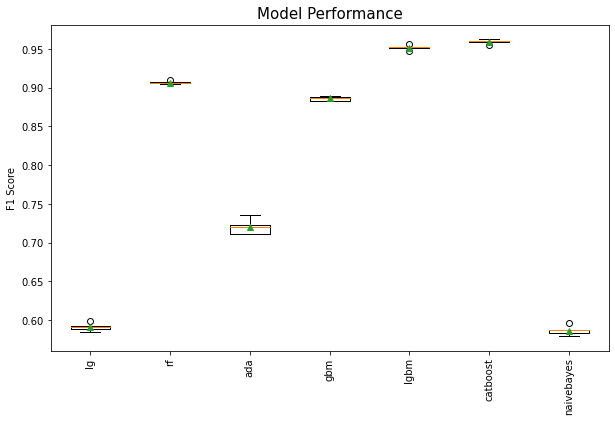

In [65]:
# Visualization for models performance.

plt.figure(figsize=(10,6))
plt.boxplot(result,labels = names, showmeans = True)
plt.xticks(rotation= 90)
plt.ylabel('F1 Score')
plt.title('Model Performance',fontsize=15)
plt.show()

In [66]:
# importing library for stacking

from sklearn.ensemble import StackingClassifier

In [67]:
# From above graph we take catboost as final and random forest, gradient boost and light gradient boost as estimators.

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

model_stacking = StackingClassifier(estimators=[('lgbm',LGBMClassifier()),
                                               ('rf',RandomForestClassifier(criterion='entropy')),
                                               ('gbm',GradientBoostingClassifier())],
                                    final_estimator=CatBoostClassifier(),cv=cv)

In [68]:
pred_stack = model_stacking.fit(smote_X,smote_y).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5344414	total: 189ms	remaining: 3m 8s
1:	learn: 0.4024372	total: 235ms	remaining: 1m 57s
2:	learn: 0.3238282	total: 283ms	remaining: 1m 33s
3:	learn: 0.2677114	total: 327ms	remaining: 1m 21s
4:	learn: 0.2303368	total: 370ms	remaining: 1m 13s
5:	learn: 0.2018809	total: 416ms	remaining: 1m 8s
6:	learn: 0.1811450	total: 461ms	remaining: 1m 5s
7:	learn: 0.1675263	total: 502ms	remaining: 1m 2s
8:	learn: 0.1541230	total: 544ms	remaining: 59.9s
9:	learn: 0.1446905	total: 587ms	remaining: 58.1s
10:	learn: 0.1387987	total: 631ms	remaining: 56.7s
11:	learn: 0.1331187	total: 676ms	remaining: 55.7s
12:	learn: 0.1279458	total: 722ms	remaining: 54.8s
13:	learn: 0.1237622	total: 764ms	remaining: 53.8s
14:	learn: 0.1205968	total: 807ms	remaining: 53s
15:	learn: 0.1182315	total: 851ms	remaining: 52.4s
16:	learn: 0.1155886	total: 902ms	remaining: 52.1s
17:	learn: 0.1142025	total: 949ms	remaining: 51.8s
18:	learn: 0.1129819	total: 998ms	remaining: 51.5s
19:	learn

161:	learn: 0.1010670	total: 7.16s	remaining: 37s
162:	learn: 0.1010556	total: 7.2s	remaining: 37s
163:	learn: 0.1010353	total: 7.25s	remaining: 36.9s
164:	learn: 0.1010187	total: 7.29s	remaining: 36.9s
165:	learn: 0.1009966	total: 7.33s	remaining: 36.8s
166:	learn: 0.1009832	total: 7.38s	remaining: 36.8s
167:	learn: 0.1009651	total: 7.42s	remaining: 36.7s
168:	learn: 0.1009417	total: 7.46s	remaining: 36.7s
169:	learn: 0.1009173	total: 7.5s	remaining: 36.6s
170:	learn: 0.1008972	total: 7.55s	remaining: 36.6s
171:	learn: 0.1008741	total: 7.59s	remaining: 36.5s
172:	learn: 0.1008589	total: 7.64s	remaining: 36.5s
173:	learn: 0.1008441	total: 7.68s	remaining: 36.5s
174:	learn: 0.1008339	total: 7.72s	remaining: 36.4s
175:	learn: 0.1008225	total: 7.76s	remaining: 36.3s
176:	learn: 0.1008012	total: 7.8s	remaining: 36.3s
177:	learn: 0.1007862	total: 7.85s	remaining: 36.3s
178:	learn: 0.1007640	total: 7.89s	remaining: 36.2s
179:	learn: 0.1007423	total: 7.94s	remaining: 36.2s
180:	learn: 0.10072

321:	learn: 0.0985502	total: 14.3s	remaining: 30.2s
322:	learn: 0.0985329	total: 14.4s	remaining: 30.1s
323:	learn: 0.0985144	total: 14.4s	remaining: 30.1s
324:	learn: 0.0985022	total: 14.5s	remaining: 30.1s
325:	learn: 0.0984898	total: 14.5s	remaining: 30s
326:	learn: 0.0984810	total: 14.6s	remaining: 30s
327:	learn: 0.0984598	total: 14.6s	remaining: 29.9s
328:	learn: 0.0984421	total: 14.7s	remaining: 29.9s
329:	learn: 0.0984181	total: 14.7s	remaining: 29.8s
330:	learn: 0.0984022	total: 14.7s	remaining: 29.8s
331:	learn: 0.0983764	total: 14.8s	remaining: 29.8s
332:	learn: 0.0983593	total: 14.8s	remaining: 29.7s
333:	learn: 0.0983499	total: 14.9s	remaining: 29.7s
334:	learn: 0.0983363	total: 14.9s	remaining: 29.6s
335:	learn: 0.0983175	total: 15s	remaining: 29.6s
336:	learn: 0.0983071	total: 15s	remaining: 29.5s
337:	learn: 0.0982897	total: 15.1s	remaining: 29.5s
338:	learn: 0.0982749	total: 15.1s	remaining: 29.5s
339:	learn: 0.0982604	total: 15.2s	remaining: 29.4s
340:	learn: 0.098255

480:	learn: 0.0962591	total: 21.7s	remaining: 23.4s
481:	learn: 0.0962477	total: 21.7s	remaining: 23.4s
482:	learn: 0.0962419	total: 21.8s	remaining: 23.3s
483:	learn: 0.0962321	total: 21.8s	remaining: 23.3s
484:	learn: 0.0962187	total: 21.9s	remaining: 23.2s
485:	learn: 0.0961942	total: 21.9s	remaining: 23.2s
486:	learn: 0.0961853	total: 22s	remaining: 23.1s
487:	learn: 0.0961720	total: 22s	remaining: 23.1s
488:	learn: 0.0961671	total: 22s	remaining: 23s
489:	learn: 0.0961434	total: 22.1s	remaining: 23s
490:	learn: 0.0961289	total: 22.1s	remaining: 22.9s
491:	learn: 0.0961206	total: 22.2s	remaining: 22.9s
492:	learn: 0.0961091	total: 22.2s	remaining: 22.9s
493:	learn: 0.0960970	total: 22.3s	remaining: 22.8s
494:	learn: 0.0960826	total: 22.3s	remaining: 22.8s
495:	learn: 0.0960646	total: 22.4s	remaining: 22.7s
496:	learn: 0.0960554	total: 22.4s	remaining: 22.7s
497:	learn: 0.0960458	total: 22.4s	remaining: 22.6s
498:	learn: 0.0960334	total: 22.5s	remaining: 22.6s
499:	learn: 0.0960230	

640:	learn: 0.0942543	total: 28.9s	remaining: 16.2s
641:	learn: 0.0942406	total: 28.9s	remaining: 16.1s
642:	learn: 0.0942252	total: 29s	remaining: 16.1s
643:	learn: 0.0942115	total: 29s	remaining: 16.1s
644:	learn: 0.0942002	total: 29.1s	remaining: 16s
645:	learn: 0.0941900	total: 29.1s	remaining: 16s
646:	learn: 0.0941829	total: 29.2s	remaining: 15.9s
647:	learn: 0.0941690	total: 29.2s	remaining: 15.9s
648:	learn: 0.0941589	total: 29.3s	remaining: 15.8s
649:	learn: 0.0941491	total: 29.3s	remaining: 15.8s
650:	learn: 0.0941365	total: 29.3s	remaining: 15.7s
651:	learn: 0.0941253	total: 29.4s	remaining: 15.7s
652:	learn: 0.0941120	total: 29.4s	remaining: 15.6s
653:	learn: 0.0940988	total: 29.5s	remaining: 15.6s
654:	learn: 0.0940905	total: 29.5s	remaining: 15.6s
655:	learn: 0.0940720	total: 29.6s	remaining: 15.5s
656:	learn: 0.0940632	total: 29.6s	remaining: 15.5s
657:	learn: 0.0940540	total: 29.7s	remaining: 15.4s
658:	learn: 0.0940470	total: 29.7s	remaining: 15.4s
659:	learn: 0.094025

800:	learn: 0.0925107	total: 36.1s	remaining: 8.97s
801:	learn: 0.0925073	total: 36.1s	remaining: 8.92s
802:	learn: 0.0925002	total: 36.2s	remaining: 8.88s
803:	learn: 0.0924905	total: 36.2s	remaining: 8.83s
804:	learn: 0.0924832	total: 36.3s	remaining: 8.79s
805:	learn: 0.0924707	total: 36.3s	remaining: 8.74s
806:	learn: 0.0924635	total: 36.4s	remaining: 8.7s
807:	learn: 0.0924564	total: 36.4s	remaining: 8.65s
808:	learn: 0.0924518	total: 36.4s	remaining: 8.61s
809:	learn: 0.0924456	total: 36.5s	remaining: 8.56s
810:	learn: 0.0924254	total: 36.5s	remaining: 8.52s
811:	learn: 0.0924138	total: 36.6s	remaining: 8.47s
812:	learn: 0.0924036	total: 36.6s	remaining: 8.43s
813:	learn: 0.0923944	total: 36.7s	remaining: 8.38s
814:	learn: 0.0923909	total: 36.7s	remaining: 8.34s
815:	learn: 0.0923781	total: 36.8s	remaining: 8.29s
816:	learn: 0.0923704	total: 36.8s	remaining: 8.25s
817:	learn: 0.0923598	total: 36.9s	remaining: 8.2s
818:	learn: 0.0923541	total: 36.9s	remaining: 8.16s
819:	learn: 0.

960:	learn: 0.0908678	total: 43.3s	remaining: 1.76s
961:	learn: 0.0908593	total: 43.4s	remaining: 1.71s
962:	learn: 0.0908484	total: 43.4s	remaining: 1.67s
963:	learn: 0.0908403	total: 43.5s	remaining: 1.62s
964:	learn: 0.0908331	total: 43.5s	remaining: 1.58s
965:	learn: 0.0908269	total: 43.6s	remaining: 1.53s
966:	learn: 0.0908128	total: 43.6s	remaining: 1.49s
967:	learn: 0.0907966	total: 43.6s	remaining: 1.44s
968:	learn: 0.0907845	total: 43.7s	remaining: 1.4s
969:	learn: 0.0907745	total: 43.7s	remaining: 1.35s
970:	learn: 0.0907671	total: 43.8s	remaining: 1.31s
971:	learn: 0.0907602	total: 43.8s	remaining: 1.26s
972:	learn: 0.0907499	total: 43.9s	remaining: 1.22s
973:	learn: 0.0907321	total: 43.9s	remaining: 1.17s
974:	learn: 0.0907173	total: 43.9s	remaining: 1.13s
975:	learn: 0.0907061	total: 44s	remaining: 1.08s
976:	learn: 0.0906979	total: 44s	remaining: 1.04s
977:	learn: 0.0906902	total: 44.1s	remaining: 991ms
978:	learn: 0.0906772	total: 44.1s	remaining: 946ms
979:	learn: 0.090

# 

##### submission file for stacking

In [69]:
submission['is_claim'] = pred_stack

In [70]:
submission.to_csv('stack_model.csv',index =False)           # test score:  0.0415

## 

### CatBoost Classifier

In [71]:
# Direct Catboost model because stacking not score well.

cboost = CatBoostClassifier(scale_pos_weight=10)
pred_catboost = cboost.fit(smote_X,smote_y).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.6238754	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.5677088	total: 116ms	remaining: 57.7s
2:	learn: 0.5210605	total: 182ms	remaining: 1m
3:	learn: 0.4829706	total: 248ms	remaining: 1m 1s
4:	learn: 0.4517320	total: 312ms	remaining: 1m 2s
5:	learn: 0.4246711	total: 374ms	remaining: 1m 1s
6:	learn: 0.4036199	total: 433ms	remaining: 1m 1s
7:	learn: 0.3863344	total: 499ms	remaining: 1m 1s
8:	learn: 0.3706381	total: 563ms	remaining: 1m 2s
9:	learn: 0.3578717	total: 626ms	remaining: 1m 1s
10:	learn: 0.3475206	total: 688ms	remaining: 1m 1s
11:	learn: 0.3376104	total: 753ms	remaining: 1m 1s
12:	learn: 0.3297835	total: 820ms	remaining: 1m 2s
13:	learn: 0.3229097	total: 884ms	remaining: 1m 2s
14:	learn: 0.3160790	total: 939ms	remaining: 1m 1s
15:	learn: 0.3113759	total: 997ms	remaining: 1m 1s
16:	learn: 0.3074287	total: 1.06s	remaining: 1m 1s
17:	learn: 0.3040188	total: 1.12s	remaining: 1m 1s
18:	learn: 0.3006134	total: 1.18s	remaining: 1m
19:	learn: 0.297

164:	learn: 0.1738277	total: 10.3s	remaining: 52s
165:	learn: 0.1729070	total: 10.3s	remaining: 52s
166:	learn: 0.1725989	total: 10.4s	remaining: 51.9s
167:	learn: 0.1715465	total: 10.5s	remaining: 51.9s
168:	learn: 0.1713098	total: 10.6s	remaining: 51.9s
169:	learn: 0.1711094	total: 10.6s	remaining: 51.9s
170:	learn: 0.1708146	total: 10.7s	remaining: 51.9s
171:	learn: 0.1699892	total: 10.8s	remaining: 51.8s
172:	learn: 0.1697940	total: 10.8s	remaining: 51.7s
173:	learn: 0.1696300	total: 10.9s	remaining: 51.7s
174:	learn: 0.1685657	total: 11s	remaining: 51.6s
175:	learn: 0.1679351	total: 11s	remaining: 51.6s
176:	learn: 0.1669556	total: 11.1s	remaining: 51.5s
177:	learn: 0.1664347	total: 11.1s	remaining: 51.4s
178:	learn: 0.1662329	total: 11.2s	remaining: 51.4s
179:	learn: 0.1660858	total: 11.3s	remaining: 51.3s
180:	learn: 0.1659517	total: 11.3s	remaining: 51.3s
181:	learn: 0.1658211	total: 11.4s	remaining: 51.2s
182:	learn: 0.1651849	total: 11.5s	remaining: 51.1s
183:	learn: 0.164930

326:	learn: 0.1311958	total: 20.5s	remaining: 42.1s
327:	learn: 0.1311401	total: 20.5s	remaining: 42.1s
328:	learn: 0.1310870	total: 20.6s	remaining: 42s
329:	learn: 0.1309972	total: 20.7s	remaining: 42s
330:	learn: 0.1309310	total: 20.7s	remaining: 41.9s
331:	learn: 0.1308471	total: 20.8s	remaining: 41.8s
332:	learn: 0.1307704	total: 20.9s	remaining: 41.8s
333:	learn: 0.1306907	total: 20.9s	remaining: 41.7s
334:	learn: 0.1306487	total: 21s	remaining: 41.6s
335:	learn: 0.1305869	total: 21s	remaining: 41.6s
336:	learn: 0.1305048	total: 21.1s	remaining: 41.5s
337:	learn: 0.1304573	total: 21.2s	remaining: 41.4s
338:	learn: 0.1303712	total: 21.2s	remaining: 41.4s
339:	learn: 0.1303315	total: 21.3s	remaining: 41.3s
340:	learn: 0.1302565	total: 21.3s	remaining: 41.3s
341:	learn: 0.1294565	total: 21.4s	remaining: 41.2s
342:	learn: 0.1290606	total: 21.5s	remaining: 41.2s
343:	learn: 0.1286850	total: 21.6s	remaining: 41.1s
344:	learn: 0.1285937	total: 21.6s	remaining: 41.1s
345:	learn: 0.128233

488:	learn: 0.1154446	total: 30.7s	remaining: 32s
489:	learn: 0.1154079	total: 30.7s	remaining: 32s
490:	learn: 0.1153695	total: 30.8s	remaining: 31.9s
491:	learn: 0.1153343	total: 30.8s	remaining: 31.9s
492:	learn: 0.1152637	total: 30.9s	remaining: 31.8s
493:	learn: 0.1152301	total: 31s	remaining: 31.7s
494:	learn: 0.1151501	total: 31s	remaining: 31.7s
495:	learn: 0.1150925	total: 31.1s	remaining: 31.6s
496:	learn: 0.1150544	total: 31.2s	remaining: 31.5s
497:	learn: 0.1150151	total: 31.2s	remaining: 31.5s
498:	learn: 0.1149928	total: 31.3s	remaining: 31.4s
499:	learn: 0.1149685	total: 31.3s	remaining: 31.3s
500:	learn: 0.1149238	total: 31.4s	remaining: 31.3s
501:	learn: 0.1148690	total: 31.4s	remaining: 31.2s
502:	learn: 0.1148319	total: 31.5s	remaining: 31.1s
503:	learn: 0.1147870	total: 31.6s	remaining: 31.1s
504:	learn: 0.1147390	total: 31.6s	remaining: 31s
505:	learn: 0.1146815	total: 31.7s	remaining: 30.9s
506:	learn: 0.1146462	total: 31.7s	remaining: 30.9s
507:	learn: 0.1146189	

650:	learn: 0.1066760	total: 40.5s	remaining: 21.7s
651:	learn: 0.1066489	total: 40.5s	remaining: 21.6s
652:	learn: 0.1066330	total: 40.6s	remaining: 21.6s
653:	learn: 0.1065456	total: 40.6s	remaining: 21.5s
654:	learn: 0.1065075	total: 40.7s	remaining: 21.4s
655:	learn: 0.1064723	total: 40.8s	remaining: 21.4s
656:	learn: 0.1064115	total: 40.8s	remaining: 21.3s
657:	learn: 0.1063763	total: 40.9s	remaining: 21.2s
658:	learn: 0.1063570	total: 40.9s	remaining: 21.2s
659:	learn: 0.1063276	total: 41s	remaining: 21.1s
660:	learn: 0.1063032	total: 41.1s	remaining: 21.1s
661:	learn: 0.1061591	total: 41.1s	remaining: 21s
662:	learn: 0.1061201	total: 41.2s	remaining: 20.9s
663:	learn: 0.1060992	total: 41.2s	remaining: 20.9s
664:	learn: 0.1060756	total: 41.3s	remaining: 20.8s
665:	learn: 0.1060528	total: 41.3s	remaining: 20.7s
666:	learn: 0.1060218	total: 41.4s	remaining: 20.7s
667:	learn: 0.1059804	total: 41.5s	remaining: 20.6s
668:	learn: 0.1059415	total: 41.5s	remaining: 20.5s
669:	learn: 0.10

810:	learn: 0.1007102	total: 50.2s	remaining: 11.7s
811:	learn: 0.1006732	total: 50.2s	remaining: 11.6s
812:	learn: 0.1006482	total: 50.3s	remaining: 11.6s
813:	learn: 0.1006097	total: 50.4s	remaining: 11.5s
814:	learn: 0.1005950	total: 50.4s	remaining: 11.4s
815:	learn: 0.1005518	total: 50.5s	remaining: 11.4s
816:	learn: 0.1005137	total: 50.6s	remaining: 11.3s
817:	learn: 0.1004694	total: 50.6s	remaining: 11.3s
818:	learn: 0.1004321	total: 50.7s	remaining: 11.2s
819:	learn: 0.1004124	total: 50.7s	remaining: 11.1s
820:	learn: 0.1003896	total: 50.8s	remaining: 11.1s
821:	learn: 0.1003664	total: 50.9s	remaining: 11s
822:	learn: 0.1003414	total: 50.9s	remaining: 10.9s
823:	learn: 0.1003268	total: 51s	remaining: 10.9s
824:	learn: 0.1003085	total: 51s	remaining: 10.8s
825:	learn: 0.1002903	total: 51.1s	remaining: 10.8s
826:	learn: 0.1002663	total: 51.2s	remaining: 10.7s
827:	learn: 0.1002461	total: 51.2s	remaining: 10.6s
828:	learn: 0.1002376	total: 51.3s	remaining: 10.6s
829:	learn: 0.1002

972:	learn: 0.0960372	total: 1m	remaining: 1.67s
973:	learn: 0.0960164	total: 1m	remaining: 1.6s
974:	learn: 0.0959668	total: 1m	remaining: 1.54s
975:	learn: 0.0959502	total: 1m	remaining: 1.48s
976:	learn: 0.0959234	total: 1m	remaining: 1.42s
977:	learn: 0.0959122	total: 1m	remaining: 1.36s
978:	learn: 0.0958946	total: 1m	remaining: 1.3s
979:	learn: 0.0958847	total: 1m	remaining: 1.23s
980:	learn: 0.0958556	total: 1m	remaining: 1.17s
981:	learn: 0.0958306	total: 1m	remaining: 1.11s
982:	learn: 0.0957940	total: 1m	remaining: 1.05s
983:	learn: 0.0957527	total: 1m	remaining: 988ms
984:	learn: 0.0957371	total: 1m	remaining: 926ms
985:	learn: 0.0956959	total: 1m	remaining: 864ms
986:	learn: 0.0956787	total: 1m	remaining: 803ms
987:	learn: 0.0956287	total: 1m 1s	remaining: 741ms
988:	learn: 0.0955942	total: 1m 1s	remaining: 679ms
989:	learn: 0.0955650	total: 1m 1s	remaining: 617ms
990:	learn: 0.0955366	total: 1m 1s	remaining: 556ms
991:	learn: 0.0955224	total: 1m 1s	remaining: 494ms
992:	le

# 

##### submission file for catboost

In [72]:
submission['is_claim']=pred_catboost
submission.to_csv('catboost_model.csv',index=False)     # test score: 0.1668     rank = 87